In [1]:
import tensorflow as tf
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
import random
import cv2
import pdb

c:\programdata\anaconda3\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\programdata\anaconda3\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\programdata\anaconda3\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\programdata\anaconda3\envs\py37\lib\site-packages\tensorflow\python\frame

In [2]:
label={"bald_uakari":0,"black_headed_night_monkey":1,"common_squirrel_monkey":2,"japanese_macaque":3,"mantled_howler":4,
       "nilgiri_langur":5,"patas_monkey":6,"pygmy_marmoset":7,"silvery_marmoset":8, "white_headed_capuchin":9}

train_img = []
test_img = []
val_img = []
t = []
y = []
k=list(label.keys())

In [3]:
k[label["bald_uakari"]]

'bald_uakari'

In [4]:
x=glob("sample/*/*.jpg")
x[0].split('\\')[-2]
x[0]

'sample\\bald_uakari\\12961458824_14a6951c26_w.jpg'

In [5]:
for i in range(10):
    t={0:glob('sample/bald_uakari/*.jpg'),
       1:glob('sample/black_headed_night_monkey/*.jpg'),
       2:glob('sample/common_squirrel_monkey/*.jpg'),
       3:glob('sample/japanese_macaque/*.jpg'),
       4:glob('sample/mantled_howler/*.jpg'),
       5:glob('sample/nilgiri_langur/*.jpg'),
       6:glob('sample/patas_monkey/*.jpg'),
       7:glob('sample/pygmy_marmoset/*.jpg'),
       8:glob('sample/silvery_marmoset/*.jpg'),
       9:glob('sample/white_headed_capuchin/*.jpg')}.get(i)
    
    random.shuffle(t)
    lent = int(len(t)*0.8)

    for j in range(lent):
        train_img.append([cv2.resize(cv2.imread(t[0], cv2.IMREAD_COLOR), dsize=(128, 128), interpolation=cv2.INTER_AREA), 
                      label[t[0].split('\\')[-2].split('/')[-1]]])
        train_img.append([cv2.resize(cv2.flip(cv2.imread(t[0], 1), cv2.IMREAD_COLOR), dsize=(128, 128), interpolation=cv2.INTER_AREA), 
                      label[t[0].split('\\')[-2].split('/')[-1]]])
        t.pop(0)

    lent = int(len(t)*0.5)
    for j in range(lent):
        val_img.append([cv2.resize(cv2.imread(t[0], cv2.IMREAD_COLOR), dsize=(128, 128), interpolation=cv2.INTER_AREA), 
                     label[t[0].split('\\')[-2].split('/')[-1]]])
        t.pop(0)
        
    lent = len(t)
    for j in range(lent):
        test_img.append([cv2.resize(cv2.imread(t[0], cv2.IMREAD_COLOR), dsize=(128, 128), interpolation=cv2.INTER_AREA), 
                     label[t[0].split('\\')[-2].split('/')[-1]]])
        t.pop(0)
        
    #test_img.append(cv2.flip(test_img[-1], 1))
    
    print (i, " done")


0  done
1  done
2  done
3  done
4  done
5  done
6  done
7  done
8  done
9  done


In [6]:
len(train_img)

11326

In [7]:
len(test_img)

712

In [8]:
len(val_img)

708

In [9]:
random.shuffle(train_img)
random.shuffle(test_img)
random.shuffle(val_img)

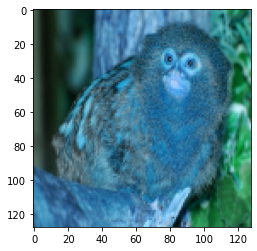

In [10]:
plt.imshow(train_img[10][0])

In [11]:
k[train_img[10][1]]

'pygmy_marmoset'

In [12]:
IMG_H = 128
IMG_W = 128
IMG_C = 3

num_class = 10


In [13]:
with tf.Graph().as_default() as tfgp:
    X = tf.placeholder(tf.float32, [None, IMG_H, IMG_W, IMG_C])
    Y = tf.placeholder(tf.int32, [None])

    with tf.variable_scope('CNN'):
        
        layer = tf.layers.conv2d(X, 48, 5, (2, 2), padding= 'valid', activation=tf.nn.relu)
        layer = tf.layers.max_pooling2d(layer, (2, 2), (2, 2))
        layer = tf.layers.conv2d(layer, 128, 3, (1, 1), padding= 'same', activation=tf.nn.relu)        
        layer = tf.layers.max_pooling2d(layer, (2, 2), (2, 2))
        layer = tf.layers.conv2d(layer, 128, 3, (1, 1), padding= 'same', activation=tf.nn.relu)
        layer = tf.layers.conv2d(layer, 128, 3, (1, 1), padding= 'same', activation=tf.nn.relu)
        layer = tf.layers.max_pooling2d(layer, (2, 2), (2, 2))
        layer = tf.layers.flatten(layer)
        
        #layer = tf.layers.dense(layer, 1024)
        out = tf.layers.dense(layer, num_class)

    with tf.variable_scope('Loss'):
        loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=Y, logits=out))

    train = tf.train.AdamOptimizer(1e-3).minimize(loss)
    saver = tf.train.Saver()

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.max_pooling2d instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.


In [14]:
np.sum([np.product(var.shape) for var in tfgp.get_collection('trainable_variables')]).value

416970

In [15]:
train_image = []
train_label = []
test_image = []
test_label = []
val_image = []
val_label = []
val = []
tra = []
cnt=0

bs=128

In [16]:
lentrain = (len(train_img))
len(test_image)

0

In [17]:
lenval = len(val_img)
for i in range(lenval):
    val_image.append(val_img[i][0])
    val_label.append(val_img[i][1])

In [18]:
with tf.Session(graph=tfgp) as sess:
    sess.run(tf.global_variables_initializer())   
    for i in range(1700):
        #pdb.set_trace()
        for j in range(bs):
            train_image.append(train_img[0][0])
            train_label.append(train_img[0][1])
            train_img.append(train_img.pop(0))
            
        _, loss_t = sess.run([train, loss], feed_dict={X: train_image, Y: train_label})
        #print(i, l)
        tra.append(loss_t)

        for j in range(bs):
            train_image.pop(0)
            train_label.pop(0)
        
        
        if i%50==0:
            loss_t = sess.run(loss, feed_dict={X: val_image, Y: val_label})
            val.append(loss_t)
    
            print("[", cnt*50, "]", val[-1])
            cnt = cnt+1
    
    print("val: ", np.argmin(val))
    saver.save(sess, 'logs/model.ckpt', global_step=i + 1)

[ 0 ] 48.25497
[ 50 ] 1.9122821
[ 100 ] 1.569402
[ 150 ] 1.4332944
[ 200 ] 1.3318381
[ 250 ] 1.2147247
[ 300 ] 1.2715161
[ 350 ] 1.1150166
[ 400 ] 1.0766288
[ 450 ] 1.0583303
[ 500 ] 1.0510564
[ 550 ] 1.0052426
[ 600 ] 1.1020824
[ 650 ] 1.0456825
[ 700 ] 1.0031378
[ 750 ] 1.2019012
[ 800 ] 1.0889938
[ 850 ] 1.3081722
[ 900 ] 1.1414531
[ 950 ] 1.2621249
[ 1000 ] 1.2435936
[ 1050 ] 1.3045117
[ 1100 ] 1.4657542
[ 1150 ] 1.3109859
[ 1200 ] 1.4011871
[ 1250 ] 1.3558155
[ 1300 ] 1.4575309
[ 1350 ] 1.5580652
[ 1400 ] 1.7589617
[ 1450 ] 1.7625015
[ 1500 ] 1.555268
[ 1550 ] 1.6403508
[ 1600 ] 1.8102332
[ 1650 ] 1.8399608
val:  14


In [19]:
for i in range(int(len(tra))):
    print ("[%d]" %i, tra[i])

[0] 27.313622
[1] 48.203224
[2] 43.578384
[3] 31.846085
[4] 21.681173
[5] 11.665156
[6] 6.7745376
[7] 5.406085
[8] 3.1960523
[9] 3.3472133
[10] 2.87899
[11] 2.5848231
[12] 2.5372033
[13] 2.34156
[14] 2.372681
[15] 2.3074322
[16] 2.2807798
[17] 2.315151
[18] 2.2621937
[19] 2.268107
[20] 2.2176814
[21] 2.2712607
[22] 2.2504544
[23] 2.1928663
[24] 2.2959514
[25] 2.242935
[26] 2.1919217
[27] 2.1609735
[28] 2.2232018
[29] 2.20256
[30] 2.168613
[31] 2.1218212
[32] 2.1753445
[33] 2.185287
[34] 2.173997
[35] 2.0572712
[36] 2.0854821
[37] 2.1658907
[38] 1.9816277
[39] 1.9170365
[40] 2.1419246
[41] 1.9174622
[42] 1.9671774
[43] 1.963725
[44] 2.1222277
[45] 2.0765262
[46] 2.0167902
[47] 1.8984747
[48] 1.9665473
[49] 1.9713409
[50] 1.9149885
[51] 1.9613773
[52] 1.8031522
[53] 2.088453
[54] 1.800394
[55] 1.8182725
[56] 2.0125675
[57] 1.8290784
[58] 1.8518051
[59] 2.041226
[60] 1.7086827
[61] 2.0286136
[62] 1.8819504
[63] 1.9572856
[64] 1.9340551
[65] 1.7832412
[66] 1.8042108
[67] 1.7802559
[68] 1.8

[585] 0.57685965
[586] 0.64505124
[587] 0.84049463
[588] 0.60907507
[589] 0.7076082
[590] 0.7352372
[591] 0.63401806
[592] 0.8899517
[593] 0.5365479
[594] 0.81494224
[595] 0.6378184
[596] 0.558004
[597] 0.6024373
[598] 0.55539775
[599] 0.63145137
[600] 0.4962227
[601] 0.5794805
[602] 0.56552494
[603] 0.68761754
[604] 0.4382124
[605] 0.5167674
[606] 0.49288684
[607] 0.6257845
[608] 0.535081
[609] 0.48498896
[610] 0.75978994
[611] 0.68410933
[612] 0.4323786
[613] 0.60634315
[614] 0.47909337
[615] 0.45780918
[616] 0.6326752
[617] 0.5791646
[618] 0.59077716
[619] 0.65657926
[620] 0.57595754
[621] 0.53532517
[622] 0.44201323
[623] 0.5028324
[624] 0.42634684
[625] 0.41790423
[626] 0.5349327
[627] 0.43058747
[628] 0.558687
[629] 0.5257109
[630] 0.5448436
[631] 0.6214279
[632] 0.6507721
[633] 0.36810488
[634] 0.56403965
[635] 0.50320065
[636] 0.45435804
[637] 0.5814456
[638] 0.5211899
[639] 0.5081158
[640] 0.59973377
[641] 0.4536438
[642] 0.4432376
[643] 0.6527804
[644] 0.5391024
[645] 0.54708

[1085] 0.21346205
[1086] 0.3083827
[1087] 0.24081883
[1088] 0.12531923
[1089] 0.22128977
[1090] 0.20007533
[1091] 0.32027882
[1092] 0.17052814
[1093] 0.191926
[1094] 0.23710975
[1095] 0.23295084
[1096] 0.19191164
[1097] 0.32717448
[1098] 0.22267345
[1099] 0.2591844
[1100] 0.18270016
[1101] 0.21493137
[1102] 0.28528768
[1103] 0.23519585
[1104] 0.2599887
[1105] 0.37882262
[1106] 0.40157527
[1107] 0.23830535
[1108] 0.24047253
[1109] 0.25204605
[1110] 0.48139942
[1111] 0.19644146
[1112] 0.13787289
[1113] 0.18780391
[1114] 0.16909853
[1115] 0.16391602
[1116] 0.39911392
[1117] 0.16780795
[1118] 0.4103441
[1119] 0.112543084
[1120] 0.2734705
[1121] 0.29914403
[1122] 0.35273403
[1123] 0.4533956
[1124] 0.14949651
[1125] 0.3110727
[1126] 0.3493716
[1127] 0.2930857
[1128] 0.22855741
[1129] 0.277934
[1130] 0.4821276
[1131] 0.4237759
[1132] 0.49553543
[1133] 0.52430034
[1134] 0.22877978
[1135] 0.19756147
[1136] 0.36040157
[1137] 0.30167478
[1138] 0.2754899
[1139] 0.21102364
[1140] 0.27160603
[1141] 

[1659] 0.0942404
[1660] 0.080954835
[1661] 0.13141677
[1662] 0.13865459
[1663] 0.11858491
[1664] 0.03276032
[1665] 0.08299042
[1666] 0.1518651
[1667] 0.19199193
[1668] 0.100295335
[1669] 0.083995506
[1670] 0.09543236
[1671] 0.4312333
[1672] 0.13976915
[1673] 0.17052737
[1674] 0.08975175
[1675] 0.18857692
[1676] 0.052900232
[1677] 0.3266623
[1678] 0.13512528
[1679] 0.1558765
[1680] 0.24871708
[1681] 0.12288514
[1682] 0.08241558
[1683] 0.08419958
[1684] 0.09809394
[1685] 0.090731
[1686] 0.06659022
[1687] 0.089667395
[1688] 0.13924938
[1689] 0.08163801
[1690] 0.056402516
[1691] 0.12428214
[1692] 0.14041276
[1693] 0.09027044
[1694] 0.029619643
[1695] 0.060954954
[1696] 0.06549214
[1697] 0.13636246
[1698] 0.18658684
[1699] 0.17041773


In [20]:
acc = 0
cnt = 1
lentest = len(test_img)


In [21]:
lentest

712

In [22]:
with tf.Session(graph=tfgp) as sess:
    sess.run(tf.global_variables_initializer())
    checkpoint = tf.train.latest_checkpoint('logs')
    if checkpoint:
        saver.restore(sess, checkpoint)
    for i in range(lentest):
        test_image.append(test_img[0][0])
        logit = sess.run(out, feed_dict={X: test_image})
        
        if np.argmax(logit[0]) == test_img[0][1]:
            acc += 1
            cv2.imwrite("./true/%s%d.jpg"%(k[test_img[0][1]],cnt), test_img[0][0])
            cnt = cnt+1
            
        else:
            print(logit[0], k[np.argmax(logit[0])], k[test_img[0][1]])
            cv2.imwrite("./false/%s%d.jpg"%(k[test_img[0][1]],cnt), test_img[0][0])
            cnt = cnt+1
            
            #cv2.imshow(k[np.argmax(logit[0])], test_image[0])
            #cv2.waitKey(0)
            #cv2.destroyAllWindows()

        test_img.append(test_img.pop(0))
        test_image.pop(0)

    print(acc / lentest)

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from logs\model.ckpt-1700
[-2.1497517 -8.2694845  6.417502   4.8460226  5.1446786  9.112766
  6.423914   1.0762024  1.0942142 -1.3854464] nilgiri_langur mantled_howler
[-6.8471603 -3.0745518  5.3795624  2.4705055  5.819596   3.0843625
 -1.7018647 13.098695  -4.19145    4.0955176] pygmy_marmoset mantled_howler
[-18.41167    -3.6641111   5.1845336  12.816724    2.1334825  10.477263
   2.1016674   4.7237735  -4.020954   10.619949 ] japanese_macaque white_headed_capuchin
[-7.2797728   7.0201945   3.3874886   5.2799544  -0.26563472  1.4175463
 14.741945   12.144081    0.77214944  5.365551  ] patas_monkey japanese_macaque
[-0.754     -8.113553   5.4099298  1.679801  -0.6674042 11.446991
 16.466549  -4.6380606  5.56824   14.031798 ] patas_monkey silvery_marmoset
[ -7.8954105   4.1668777   3.5809448  -6.9755387  17.542805   17.696623
   5.615515  -13.057014   -7.439494   

[ -2.876718    8.461732   14.24723    -2.5938826 -10.584652   -3.7969096
   9.494088   11.163137    0.7709897   6.915094 ] common_squirrel_monkey black_headed_night_monkey
[-14.202134   -8.308267   -5.0373216  -3.3729587  12.97367    15.224184
  -1.5823827  -3.5180051  -4.4180045  14.886396 ] nilgiri_langur mantled_howler
[-21.577349    1.3338871  -3.2282238  10.252224    8.138151   16.179174
   6.5398316   4.895907    3.0924578  17.435726 ] white_headed_capuchin nilgiri_langur
[-9.089504   2.783044  14.96554    1.888106  -4.8938136 -1.4342718
 16.912996  15.208408   1.169186   6.7085195] patas_monkey common_squirrel_monkey
[ 3.319282  21.286127  25.123838   7.0491977 -4.438408  -3.0475192
 15.099219  12.721642  15.396379  10.464771 ] common_squirrel_monkey silvery_marmoset
[-16.860722    7.6556334   3.8740332  10.487421   -5.2801323   0.9730185
  15.714697    5.6906147   8.120832   14.391614 ] patas_monkey japanese_macaque
[-18.189617     0.21001285   7.9526467   10.025538     0.75335

  2.1368914  12.205785   -4.3867874  -0.90337956] common_squirrel_monkey pygmy_marmoset
[-3.1119251   4.8129387   5.017438    0.27124664  1.2437172   2.628888
  3.2729566   4.784706   -4.4500074   2.7457235 ] common_squirrel_monkey black_headed_night_monkey
[-0.8435635 -3.5179665  1.2054225  0.5923471  2.201494   4.7594185
  7.3159294  1.1306105  1.0822247  7.4515676] white_headed_capuchin patas_monkey
[-10.928601    0.7599709   5.4652157   9.345082   -8.78787     4.3775616
  10.801575    3.8601434   6.3349223   6.5846276] patas_monkey japanese_macaque
[-16.304008    3.3695374   1.8129365 -15.563492   24.563738   21.173532
   2.2264733  -2.7446318   3.4297845  13.534045 ] mantled_howler nilgiri_langur
[-21.256805    2.24988     8.924681    8.713801   -0.4205655   0.7638603
  15.805912    2.299814    5.4272676   9.471889 ] patas_monkey common_squirrel_monkey
[-9.597052   4.387231   7.3689837  8.886119   2.098361  10.289435
 10.367512   7.8373585 -3.9782202  3.1526024] patas_monkey commo

[-9.8935995 19.55914   13.961524   3.5288093  3.9469419  8.677724
 18.811407   5.2579536 14.551338  -1.5774683] black_headed_night_monkey patas_monkey
[-4.468817   -5.9340105   5.0987487  -7.5749106   0.9915339  12.877382
  0.24694926 -1.1331966  -0.27229026  3.9838514 ] nilgiri_langur white_headed_capuchin
[-16.720274    -7.2589946   -0.9363306    0.27253872  17.42653
  17.118286     1.7924601   -1.4715188   -1.4622532   10.461201  ] mantled_howler nilgiri_langur
[-28.1928       9.15692     12.020199    -3.0473363    6.309211
   4.20927      0.72315896  16.42068      7.2642856   25.749172  ] white_headed_capuchin pygmy_marmoset
[-14.6554165  -7.161133    8.091023   -6.529613   22.23636    24.558819
 -10.65104    -9.451453   -0.8572862   7.5367665] nilgiri_langur mantled_howler
[-9.376083   5.407331   7.4820895  8.594866   2.2393138  7.1796536
  5.7425513  9.537779  -4.0735984  0.8839799] pygmy_marmoset common_squirrel_monkey
[-9.303207   2.0654979  8.292543   7.704119  -5.16446   -1.6